In [148]:
import numpy as np
import pandas as pd

In [149]:
dataset = "wikipedia"
model = 'qwen3-4b'
df = pd.read_csv(f'results/{dataset}/{dataset}_{model}.csv')

df_all = pd.read_csv(f'results/results_{dataset}.csv')

df_bm = pd.read_csv("results/results_wikipedia_bm25_udpipe_k12.csv")
df_all = pd.concat(
    [df_all, df_bm],
    ignore_index=True,
    sort=False
)


In [150]:
docs = pd.read_json(f'datasets/{dataset}/docs.jsonl', lines=True)


In [151]:
docs["title"] = docs["text"].str.extract(r"title:\s*(.+?)\n")

In [152]:
id2title = docs.set_index("docID")["title"].to_dict()


In [153]:
df["retrieved_doc_ids"]

0      0,3,0,3,0,0,0,0,0,0,0,10,0,3,0,3,3,10,0,3,0,3,...
1      0,0,0,7,3,0,3,7,3,7,3,7,0,0,3,6,7,0,0,0,0,7,0,...
2      3,0,3,3,3,3,0,0,3,0,0,3,3,3,0,0,0,3,3,0,0,0,0,...
3      0,3,0,3,3,0,0,0,0,0,0,3,3,0,3,0,0,3,3,0,3,0,0,...
4      10,0,10,10,0,10,10,10,10,0,10,10,0,10,0,10,10,...
                             ...                        
315    19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...
316    19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...
317    19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...
318    19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...
319    19,19,19,19,19,15,19,19,19,19,12,19,19,19,19,1...
Name: retrieved_doc_ids, Length: 320, dtype: object

In [154]:
df["correct_doc_title"] = df["correct_docs"].map(id2title)
df["retrieved_doc_ids_list"] = (
    df["retrieved_doc_ids"]
    .str.split(",")
    .apply(lambda xs: [int(x) for x in xs if x != ""])
)
df["retrieved_doc_titles"] = df["retrieved_doc_ids_list"].apply(
    lambda ids: [id2title.get(i) for i in ids]
)



In [155]:
df

,query_id,query_text,correct_docs,retrieved_doc_ids,mrr@1,mrr@3,mrr@5,mrr@10,mrr@20,mrr@50,...,recall@20,precision@20,recall@50,precision@50,recall@100,precision@100,latency_sec,correct_doc_title,retrieved_doc_ids_list,retrieved_doc_titles
0,0,Jaká je anglická zkratka pro úzkou umělou inte...,0,"0,3,0,3,0,0,0,0,0,0,0,10,0,3,0,3,3,10,0,3,0,3,...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.60,1.0,0.62,1.0,0.71,0.111605,umělá inteligence,"[0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 10, 0, 3, 0,...","[umělá inteligence, obecná umělá inteligence, ..."
1,1,Které dva virtuální asistenti jsou v článku uv...,0,"0,0,0,7,3,0,3,7,3,7,3,7,0,0,3,6,7,0,0,0,0,7,0,...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.45,1.0,0.50,1.0,0.53,0.081753,umělá inteligence,"[0, 0, 0, 7, 3, 0, 3, 7, 3, 7, 3, 7, 0, 0, 3, ...","[umělá inteligence, umělá inteligence, umělá i..."
2,2,Jaký termín v češtině označuje 'artificial gen...,0,"3,0,3,3,3,3,0,0,3,0,0,3,3,3,0,0,0,3,3,0,0,0,0,...",0.0,0.5,0.5,0.5,0.5,0.5,...,1.0,0.45,1.0,0.62,1.0,0.74,0.083771,umělá inteligence,"[3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, ...","[obecná umělá inteligence, umělá inteligence, ..."
3,3,Jak se v českém textu nazývá 'artificial super...,0,"0,3,0,3,3,0,0,0,0,0,0,3,3,0,3,0,0,3,3,0,3,0,0,...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.60,1.0,0.70,1.0,0.73,0.086215,umělá inteligence,"[0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, ...","[umělá inteligence, obecná umělá inteligence, ..."
4,4,"Jak se jmenuje neuronová síť, která vznikla ja...",0,"10,0,10,10,0,10,10,10,10,0,10,10,0,10,0,10,10,...",0.0,0.5,0.5,0.5,0.5,0.5,...,1.0,0.30,1.0,0.18,1.0,0.17,0.089496,umělá inteligence,"[10, 0, 10, 10, 0, 10, 10, 10, 10, 0, 10, 10, ...","[neuronová síť, umělá inteligence, neuronová s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,Proč je při heteroskedasticitě vhodnější použí...,19,"19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.00,1.0,0.94,1.0,0.71,0.044133,lineární regrese,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[lineární regrese, lineární regrese, lineární ..."
316,316,Kolik koeficientů obsahuje lineární regrese po...,19,"19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.00,1.0,1.00,1.0,0.84,0.044334,lineární regrese,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[lineární regrese, lineární regrese, lineární ..."
317,317,Kdo je uveden jako tvůrce metody nejmenších čt...,19,"19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.95,1.0,0.78,1.0,0.59,0.044094,lineární regrese,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[lineární regrese, lineární regrese, lineární ..."
318,318,Jaký je hlavní princip lineární regrese podle ...,19,"19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.00,1.0,1.00,1.0,0.79,0.044117,lineární regrese,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[lineární regrese, lineární regrese, lineární ..."


In [156]:
docs

,docID,source,text,title
0,0,https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_...,title: umělá inteligence\nurl: https://cs.wiki...,umělá inteligence
1,1,https://cs.wikipedia.org/wiki/Strojov%C3%A9_u%...,title: strojové učení\nurl: https://cs.wikiped...,strojové učení
2,2,https://cs.wikipedia.org/wiki/Algoritmus,title: algoritmus\nurl: https://cs.wikipedia.o...,algoritmus
3,3,https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C...,title: obecná umělá inteligence\nurl: https://...,obecná umělá inteligence
4,4,https://cs.wikipedia.org/wiki/Zpracov%C3%A1n%C...,title: nlp\nurl: https://cs.wikipedia.org/wiki...,nlp
5,5,https://cs.wikipedia.org/wiki/Word2Vec,title: word2vec\nurl: https://cs.wikipedia.org...,word2vec
6,6,https://cs.wikipedia.org/wiki/Strojov%C3%BD_p%...,title: strojový překlad\nurl: https://cs.wikip...,strojový překlad
7,7,https://cs.wikipedia.org/wiki/ChatGPT,title: chatgpt\nurl: https://cs.wikipedia.org/...,chatgpt
8,8,https://cs.wikipedia.org/wiki/Rys_(lingvistika),title: rys (lingvistika)\nurl: https://cs.wiki...,rys (lingvistika)
9,9,https://cs.wikipedia.org/wiki/Tvaroslov%C3%AD,title: tvarosloví\nurl: https://cs.wikipedia.o...,tvarosloví


In [157]:
df_gold = pd.read_json(f'datasets/{dataset}/queries.jsonl', lines=True)

In [158]:
df_gold

,query,docID,answer,type
0,Jaká je anglická zkratka pro úzkou umělou inte...,[0],NAI,direct
1,Které dva virtuální asistenti jsou v článku uv...,[0],Google Assistant a Siri,direct
2,Jaký termín v češtině označuje 'artificial gen...,[0],obecná umělá inteligence (AGI),direct
3,Jak se v českém textu nazývá 'artificial super...,[0],Superinteligence,direct
4,"Jak se jmenuje neuronová síť, která vznikla ja...",[0],Grossbergova neuronová síť,direct
...,...,...,...,...
315,Proč je při heteroskedasticitě vhodnější použí...,[19],Protože předpoklad homoskedasticity může vést ...,paraphrase
316,Kolik koeficientů obsahuje lineární regrese po...,[19],Text uvádí pouze dva koeficienty a a b; model ...,trick
317,Kdo je uveden jako tvůrce metody nejmenších čt...,[19],Text neuvádí autora metody nejmenších čtverců,trick
318,Jaký je hlavní princip lineární regrese podle ...,[19],"Najít přímku (nebo lineární kombinaci funkcí),...",summary


In [159]:
df_all.model_name.unique()

array(['nvidia/llama-embed-nemotron-8b', 'Qwen/Qwen3-Embedding-8B',
       'BAAI/bge-multilingual-gemma2',
       'sentence-transformers/all-MiniLM-L6-v2',
       'intfloat/multilingual-e5-large-instruct', 'fav-kky/FERNET-C5',
       'all-mpnet-base-v2',
       'sentence-transformers/paraphrase-xlm-r-multilingual-v1',
       'Qwen/Qwen3-Embedding-4B', 'text-embedding-3-small',
       'text-embedding-3-large', 'BM25_k12_b1'], dtype=object)

In [160]:
df_all[['model_name', 'mrr@1', 'mrr@3', 'mrr@5', 'mrr@10']].sort_values(by='mrr@3', ascending=False)

,model_name,mrr@1,mrr@3,mrr@5,mrr@10
20,BAAI/bge-multilingual-gemma2,0.959375,0.975521,0.977083,0.977083
21,BAAI/bge-multilingual-gemma2,0.962500,0.972396,0.975052,0.975399
4,BAAI/bge-multilingual-gemma2,0.953125,0.971875,0.973281,0.973802
24,Qwen/Qwen3-Embedding-8B,0.959375,0.970833,0.972865,0.973212
19,Qwen/Qwen3-Embedding-8B,0.959375,0.970313,0.972500,0.973021
27,Qwen/Qwen3-Embedding-8B,0.953125,0.968750,0.970313,0.970833
22,Qwen/Qwen3-Embedding-4B,0.946875,0.967708,0.968333,0.968854
17,Qwen/Qwen3-Embedding-4B,0.943750,0.964063,0.966250,0.966250
23,nvidia/llama-embed-nemotron-8b,0.943750,0.962500,0.964688,0.965556
11,Qwen/Qwen3-Embedding-4B,0.943750,0.961979,0.963385,0.964613


In [161]:
df_top = df_all[((df_all['use_first_chunk_only'] == False) & ((df_all['chunk_size'] == 1024) | (df_all['model_name'] == 'BM25_k12_b1')))][['model_name', 'prompt_mode','use_first_chunk_only','chunk_size','overlap','mrr@3','mrr@1' , 'mrr@5', 'mrr@10']].sort_values(by='model_name', ascending=True)

In [162]:
df_top

,model_name,prompt_mode,use_first_chunk_only,chunk_size,overlap,mrr@3,mrr@1,mrr@5,mrr@10
4,BAAI/bge-multilingual-gemma2,custom,False,1024,100,0.971875,0.953125,0.973281,0.973802
28,BM25_k12_b1,none,False,0,0,0.925000,0.884375,0.931094,0.931615
11,Qwen/Qwen3-Embedding-4B,custom,False,1024,100,0.961979,0.943750,0.963385,0.964613
27,Qwen/Qwen3-Embedding-8B,custom,False,1024,100,0.968750,0.953125,0.970313,0.970833
9,all-mpnet-base-v2,none,False,1024,100,0.507292,0.443750,0.522917,0.534714
8,fav-kky/FERNET-C5,none,False,1024,100,0.396875,0.312500,0.419375,0.441455
7,intfloat/multilingual-e5-large-instruct,none,False,1024,100,0.902083,0.878125,0.904271,0.907659
5,nvidia/llama-embed-nemotron-8b,custom,False,1024,100,0.955729,0.937500,0.957135,0.959023
6,sentence-transformers/all-MiniLM-L6-v2,none,False,1024,100,0.628125,0.556250,0.644531,0.655290
10,sentence-transformers/paraphrase-xlm-r-multili...,none,False,1024,100,0.833854,0.781250,0.839479,0.842811


In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


with open("model_colors.pkl", "rb") as f:
    MODEL_COLORS = pickle.load(f)


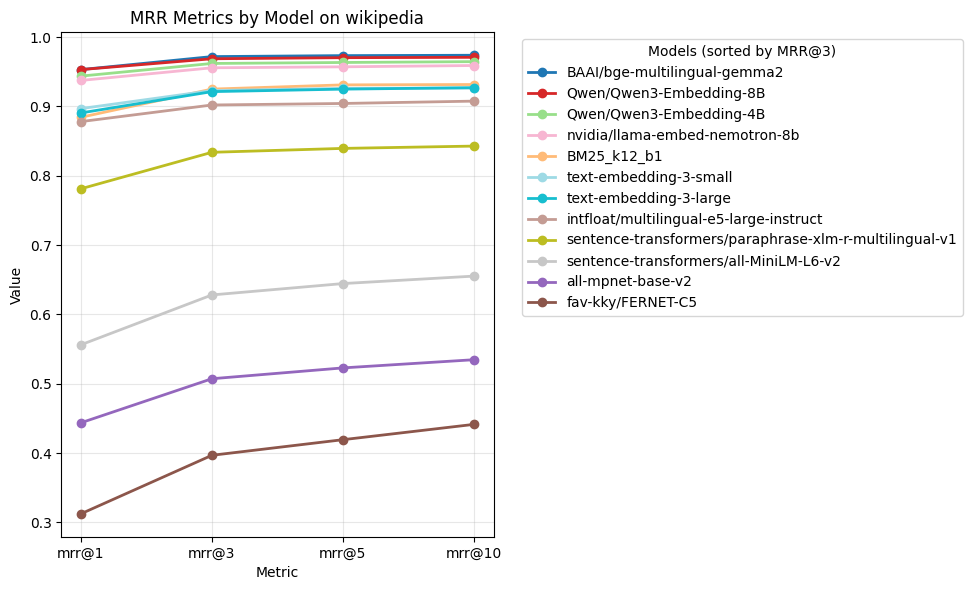

In [165]:
cols = ['mrr@1', 'mrr@3', 'mrr@5', 'mrr@10']

# sort by mrr@3 (descending – best models on top)
df_sorted = df_top.sort_values('mrr@3', ascending=False)

plt.figure(figsize=(10, 6))

for _, row in df_sorted.iterrows():
    model = row['model_name']
    plt.plot(
        cols,
        row[cols],
        marker='o',
        linewidth=2,
        color=MODEL_COLORS[model],
        label=model
    )


plt.xlabel("Metric")
plt.ylabel("Value")
plt.title(f"MRR Metrics by Model on {dataset}")
plt.legend(title="Models (sorted by MRR@3)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


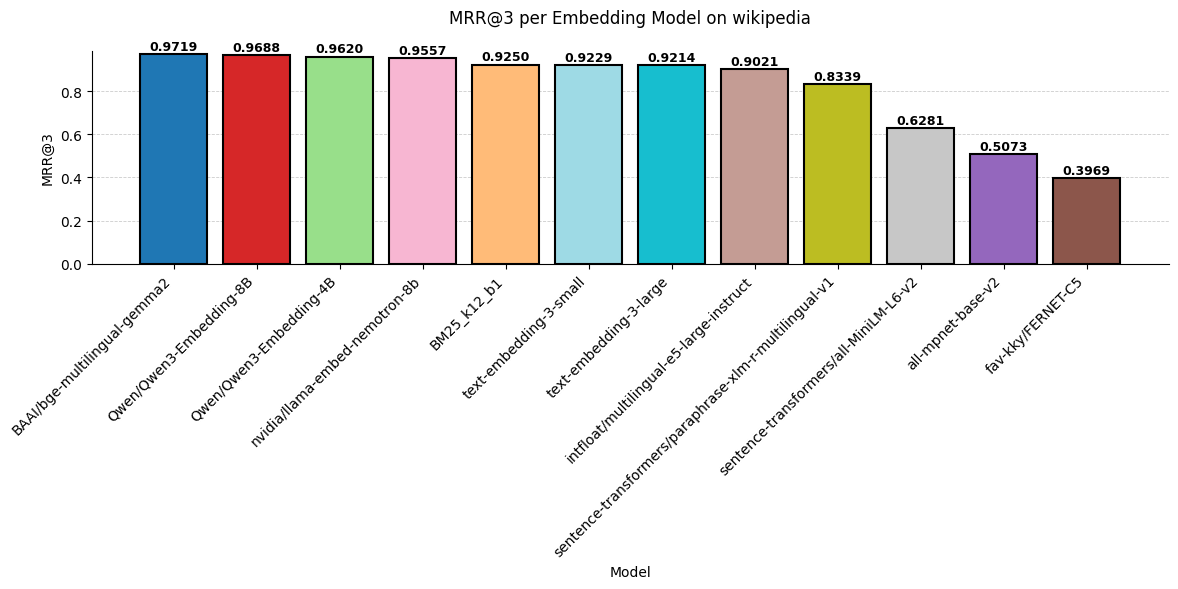

In [166]:
# Sort by mrr@3
df_sorted = df_top.sort_values("mrr@3", ascending=False)

plt.figure(figsize=(12, 6))
ax = plt.gca()

bars = plt.bar(
    df_sorted["model_name"],
    df_sorted["mrr@3"],
    color=[MODEL_COLORS[m] for m in df_sorted["model_name"]], edgecolor="black",      # 👈 THIS
    linewidth=1.5
)

# ---- find tallest bar per model ----
tallest_by_model = {}

for bar, model in zip(bars, df_sorted["model_name"]):
    height = bar.get_height()
    if model not in tallest_by_model or height > tallest_by_model[model][1]:
        tallest_by_model[model] = (bar, height)

# dynamic offset
heights = [h for _, h in tallest_by_model.values()]
y_offset = 0.01 * (max(heights) - min(heights))

# ---- annotate only tallest bars ----
for bar, height in tallest_by_model.values():
    x = bar.get_x() + bar.get_width() / 2
    ax.text(
        x,
        height + y_offset,
        f"{height:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

# ---- styling ----
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(
    axis="y",
    color="gray",
    linestyle="--",
    linewidth=0.6,
    alpha=0.4,
)
ax.set_axisbelow(True)

plt.xlabel("Model")
plt.ylabel("MRR@3")
plt.title(f"MRR@3 per Embedding Model on {dataset}", pad=20)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(heights) + 3 * y_offset)
plt.tight_layout()
plt.show()


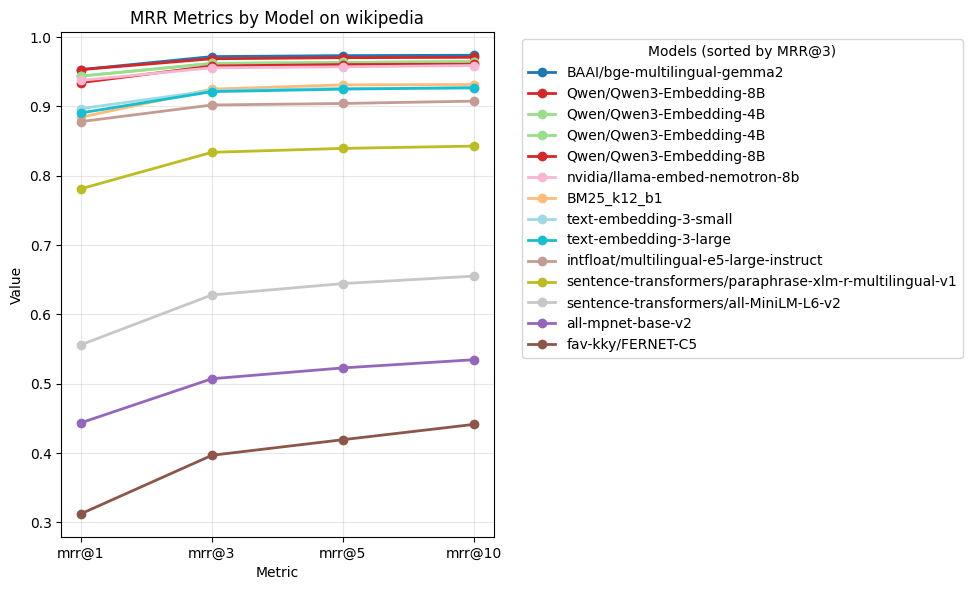

In [96]:
cols = ['mrr@1', 'mrr@3', 'mrr@5', 'mrr@10']

# sort by mrr@3 (descending – best models on top)
df_sorted = df_top.sort_values('mrr@3', ascending=False)

plt.figure(figsize=(10, 6))

for _, row in df_sorted.iterrows():
    model = row['model_name']
    plt.plot(
        cols,
        row[cols],
        marker='o',
        linewidth=2,
        color=MODEL_COLORS[model],
        label=model
    )


plt.xlabel("Metric")
plt.ylabel("Value")
plt.title(f"MRR Metrics by Model on {dataset}")
plt.legend(title="Models (sorted by MRR@3)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [97]:
# count mrr3 1 and 0s
df['mrr@3'].value_counts()

mrr@3
1.000000    303
0.500000     12
0.000000      3
0.333333      2
Name: count, dtype: int64

In [98]:
df

,query_id,query_text,correct_docs,retrieved_doc_ids,mrr@1,mrr@3,mrr@5,mrr@10,mrr@20,mrr@50,...,recall@20,precision@20,recall@50,precision@50,recall@100,precision@100,latency_sec,correct_doc_title,retrieved_doc_ids_list,retrieved_doc_titles
0,0,Jaká je anglická zkratka pro úzkou umělou inte...,0,"0,3,0,3,0,0,0,0,0,0,0,10,0,3,0,3,3,10,0,3,0,3,...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.60,1.0,0.62,1.0,0.71,0.111605,umělá inteligence,"[0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 10, 0, 3, 0,...","[umělá inteligence, obecná umělá inteligence, ..."
1,1,Které dva virtuální asistenti jsou v článku uv...,0,"0,0,0,7,3,0,3,7,3,7,3,7,0,0,3,6,7,0,0,0,0,7,0,...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.45,1.0,0.50,1.0,0.53,0.081753,umělá inteligence,"[0, 0, 0, 7, 3, 0, 3, 7, 3, 7, 3, 7, 0, 0, 3, ...","[umělá inteligence, umělá inteligence, umělá i..."
2,2,Jaký termín v češtině označuje 'artificial gen...,0,"3,0,3,3,3,3,0,0,3,0,0,3,3,3,0,0,0,3,3,0,0,0,0,...",0.0,0.5,0.5,0.5,0.5,0.5,...,1.0,0.45,1.0,0.62,1.0,0.74,0.083771,umělá inteligence,"[3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, ...","[obecná umělá inteligence, umělá inteligence, ..."
3,3,Jak se v českém textu nazývá 'artificial super...,0,"0,3,0,3,3,0,0,0,0,0,0,3,3,0,3,0,0,3,3,0,3,0,0,...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.60,1.0,0.70,1.0,0.73,0.086215,umělá inteligence,"[0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, ...","[umělá inteligence, obecná umělá inteligence, ..."
4,4,"Jak se jmenuje neuronová síť, která vznikla ja...",0,"10,0,10,10,0,10,10,10,10,0,10,10,0,10,0,10,10,...",0.0,0.5,0.5,0.5,0.5,0.5,...,1.0,0.30,1.0,0.18,1.0,0.17,0.089496,umělá inteligence,"[10, 0, 10, 10, 0, 10, 10, 10, 10, 0, 10, 10, ...","[neuronová síť, umělá inteligence, neuronová s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,Proč je při heteroskedasticitě vhodnější použí...,19,"19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.00,1.0,0.94,1.0,0.71,0.044133,lineární regrese,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[lineární regrese, lineární regrese, lineární ..."
316,316,Kolik koeficientů obsahuje lineární regrese po...,19,"19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.00,1.0,1.00,1.0,0.84,0.044334,lineární regrese,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[lineární regrese, lineární regrese, lineární ..."
317,317,Kdo je uveden jako tvůrce metody nejmenších čt...,19,"19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.95,1.0,0.78,1.0,0.59,0.044094,lineární regrese,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[lineární regrese, lineární regrese, lineární ..."
318,318,Jaký je hlavní princip lineární regrese podle ...,19,"19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,1...",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.00,1.0,1.00,1.0,0.79,0.044117,lineární regrese,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[lineární regrese, lineární regrese, lineární ..."


In [99]:
df.columns

Index(['query_id', 'query_text', 'correct_docs', 'retrieved_doc_ids', 'mrr@1',
       'mrr@3', 'mrr@5', 'mrr@10', 'mrr@20', 'mrr@50', 'mrr@100',
       'sample_docs', 'recall@1', 'precision@1', 'recall@3', 'precision@3',
       'recall@5', 'precision@5', 'recall@10', 'precision@10', 'recall@20',
       'precision@20', 'recall@50', 'precision@50', 'recall@100',
       'precision@100', 'latency_sec', 'correct_doc_title',
       'retrieved_doc_ids_list', 'retrieved_doc_titles'],
      dtype='object')

In [103]:
counts = df['mrr@3'].value_counts()
percents = df['mrr@3'].value_counts(normalize=True).mul(100)

result = pd.DataFrame({
    'count': counts,
    'percent': percents.round(2)
})

result


,count,percent
mrr@3,,
1.000000,303,94.69
0.500000,12,3.75
0.000000,3,0.94
0.333333,2,0.62


In [101]:
def first_rank(row):
    correct = row['correct_docs']
    for i, doc_id in enumerate(row['retrieved_doc_ids_list']):
        if doc_id == correct:
            return i + 1
    return None
df['first_correct_rank'] = df.apply(first_rank, axis=1)


In [73]:
df['first_correct_rank'].value_counts().sort_index()


first_correct_rank
1     303
2      12
3       2
5       1
6       1
74      1
Name: count, dtype: int64

In [66]:
wrong_df = df[df['mrr@3'] ==0]

šupler zubří:
title: zuby zubní ordinace zuby zubaři zubní url: http://zubniordinace.info/zuby text: title: zuby zuby url: zubniordinace.info/zuby  bte: Člověk v průběhu svého života zažije dva odlišné typy chrupu....



In [104]:
from pprint import pprint
import ast
import re

# Create id2url mapping for efficient lookup
id2url = docs.set_index("docID")["source"].to_dict()

# Select ALL failed queries
subset = df[df['mrr@3'] == 0]

print(f"\n=== FAILED QUERIES (MRR@3 = 0) ===")
print(f"Total: {len(subset)} / {len(df)}\n")

for idx, row in subset.iterrows():
    print(f"\n=== ROW {idx} ===")
    print("QUERY:")
    print(row['query_text'])

    # Correct document
    correct_doc_id = int(row['correct_docs']) if pd.notna(row['correct_docs']) else None
    correct_doc_title = row.get('correct_doc_title', 'N/A')
    correct_doc_url = id2url.get(correct_doc_id) if correct_doc_id is not None else None

    print("\nCORRECT DOC:")
    if correct_doc_id is not None:
        print(f"  ID {correct_doc_id}: {correct_doc_title}")
        if correct_doc_url:
            print(f"  URL: {correct_doc_url}")
    else:
        print("  (No correct doc)")

    # Retrieved documents
    retrieved_ids = row.get('retrieved_doc_ids_list', [])
    retrieved_titles = row.get('retrieved_doc_titles', [])

    print(f"\nRETRIEVED DOCS ({len(retrieved_ids)}):")
    for rank, (doc_id, title) in enumerate(zip(retrieved_ids, retrieved_titles), 1):
        is_correct = (doc_id == correct_doc_id) if correct_doc_id is not None else False
        marker = "✓" if is_correct else " "
        title_display = title if title and pd.notna(title) else f"Doc {doc_id} (title not found)"
        doc_url = id2url.get(doc_id, "URL not found")
        print(f"  [{rank:2d}] {marker} ID {doc_id:2d}: {title_display} | {doc_url}")

    # Sample docs preview
    if 'sample_docs' in row and pd.notna(row['sample_docs']):
        print("\nSAMPLE_DOCS (first 3):")
        sample_docs = row['sample_docs']
        if isinstance(sample_docs, str):
            try:
                sample_docs = ast.literal_eval(sample_docs)
            except:
                pass

        if isinstance(sample_docs, (list, tuple)):
            for i, doc in enumerate(sample_docs[:3]):
                title_match = re.search(
                    r'title:\s*([^\n\r]+?)(?:\s+url:|$)',
                    str(doc),
                    re.IGNORECASE
                )
                doc_title = title_match.group(1).strip() if title_match else f"Doc {i}"
                doc_preview = str(doc)[:200].replace('\n', ' ')
                print(f"  [{i}] {doc_title}")
                print(f"      {doc_preview}...")



=== FAILED QUERIES (MRR@3 = 0) ===
Total: 3 / 320


=== ROW 6 ===
QUERY:
Jaký technologický pokrok by mohl podmínit vznik obecné umělé inteligence?

CORRECT DOC:
  ID 0: umělá inteligence
  URL: https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_inteligence

RETRIEVED DOCS (100):
  [ 1]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 2]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 3]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 4]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 5]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 6] ✓ ID  0: umělá inteligence | https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_inteligence
  [ 7] ✓ ID  0: umělá inteligence | https://cs.wikipedia.org/wik

In [115]:
from pprint import pprint
import ast
import re

# Create id2url mapping for efficient lookup
id2url = docs.set_index("docID")["source"].to_dict()

subset = wrong_df.head(100)

for idx, row in subset.iterrows():
    #print(f"\n=== ROW {idx} ===")
    print(f" QUERY:")
    print(row['query_text'])
    
    # Parse correct docs
    correct_doc_id = int(row['correct_docs']) if pd.notna(row['correct_docs']) else None
    correct_doc_title = row.get('correct_doc_title', 'N/A')
    correct_doc_url = id2url.get(correct_doc_id) if correct_doc_id is not None else None
    
    print(f"\nCORRECT DOC:")
    if correct_doc_id is not None:
        print(f"  ID {correct_doc_id}: {correct_doc_title}")
        if correct_doc_url:
            print(f"  URL: {correct_doc_url}")
    else:
        print("  (No correct doc)")
    
    # Display retrieved docs with titles and URLs
    retrieved_ids = row.get('retrieved_doc_ids_list', [])
    retrieved_titles = row.get('retrieved_doc_titles', [])
    
    print(f"\nRETRIEVED DOCS ({len(retrieved_ids)}, showing 10):")
    for rank, (doc_id, title) in enumerate(zip(retrieved_ids[:10], retrieved_titles[:10]), 1):
        # Check if this is the correct doc
        is_correct = (doc_id == correct_doc_id) if correct_doc_id is not None else False
        marker = "✓" if is_correct else " "
        title_display = title if title and pd.notna(title) else f"Doc {doc_id} (title not found)"
        doc_url = id2url.get(doc_id, "URL not found")
        print(f"  [{rank:2d}] {marker} ID {doc_id:2d}: {title_display} | {doc_url}")
    
    # Show sample docs preview (first 3)
    if 'sample_docs' in row and pd.notna(row['sample_docs']):
        print("\nRetriev docs short excerpt (first 3):")
        sample_docs = row['sample_docs']
        if isinstance(sample_docs, str):
            try:
                sample_docs = ast.literal_eval(sample_docs)
            except:
                pass
        
        if isinstance(sample_docs, (list, tuple)):
            for i, doc in enumerate(sample_docs[:3]):
                # Extract title from doc string
                title_match = re.search(r'title:\s*([^\n\r]+?)(?:\s+url:|$)', str(doc), re.IGNORECASE)
                doc_title = title_match.group(1).strip() if title_match else f"Doc {i}"
                doc_preview = str(doc)[:600].replace('\n', ' ')
                print(f"  [{i+1}] ")
                print(f"      {doc_preview}")

 QUERY:
Jaký technologický pokrok by mohl podmínit vznik obecné umělé inteligence?

CORRECT DOC:
  ID 0: umělá inteligence
  URL: https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_inteligence

RETRIEVED DOCS (100, showing 10):
  [ 1]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 2]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 3]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 4]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 5]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 6] ✓ ID  0: umělá inteligence | https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_inteligence
  [ 7] ✓ ID  0: umělá inteligence | https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_inteligence
  [ 8]   ID  3: obecná u

=== ROW 81 ===
QUERY:
Pro kterou společnost pracuje Greg Corrado podle textu?

CORRECT DOC:
  ID 5: word2vec
  URL: https://cs.wikipedia.org/wiki/Word2Vec

RETRIEVED DOCS (100):
  [ 1]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 2]   ID 18: jazykový korpus | https://cs.wikipedia.org/wiki/Jazykov%C3%BD_korpus
  [ 3]   ID 13: dolování z textů | https://cs.wikipedia.org/wiki/Dolov%C3%A1n%C3%AD_z_textu
  [ 4]   ID 18: jazykový korpus | https://cs.wikipedia.org/wiki/Jazykov%C3%BD_korpus
  [ 5]   ID 18: jazykový korpus | https://cs.wikipedia.org/wiki/Jazykov%C3%BD_korpus
  [ 6]   ID 18: jazykový korpus | https://cs.wikipedia.org/wiki/Jazykov%C3%BD_korpus

SAMPLE_DOCS (first 3):
  [0] Doc 0
      e do pěti let, věří šéf společnosti Nvidia. ČT24 [online]. Česká televize [cit. 2024-03-04]. Dostupné online . Související články Umělá inteligence Filozofie umělé inteligence Inteligentní prostředí M...
  [1] Doc 1
      vyvíjí společnost Lexical Computing Ltd . ve spolupráci s Centrem zpracování přirozeného jazyka při Fakultě informatiky Masarykovy univerzity . Olomoucký mluvený korpus Od roku 2002 vzniká na Univerzi...
  [2] Doc 2
      ahy (např. z výrazu "Sarkozy se oženil s Bruinovou" je možné získat vztah, že Bruinová je manželkou Sarkozyho). Odkazy Reference ↑ Unstructured Data and the 80 Percent Rule. www.clarabridge.com [onlin...


QUERY:
Jaké výhody přináší použití reinforcement learningu ve srovnání s učením s učitelem?

CORRECT DOC:
  ID 1: strojové učení
  URL: https://cs.wikipedia.org/wiki/Strojov%C3%A9_u%C4%8Den%C3%AD

RETRIEVED DOCS (100):
  [ 1]   ID 10: neuronová síť | https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_neuronov%C3%A1_s%C3%AD%C5%A5
  [ 2]   ID 15: učení bez učitele | https://cs.wikipedia.org/wiki/U%C4%8Den%C3%AD_bez_u%C4%8Ditele
  [ 3]   ID 10: neuronová síť | https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_neuronov%C3%A1_s%C3%AD%C5%A5
  [ 4]   ID 15: učení bez učitele | https://cs.wikipedia.org/wiki/U%C4%8Den%C3%AD_bez_u%C4%8Ditele
  [ 5] ✓ ID  1: strojové učení | https://cs.wikipedia.org/wiki/Strojov%C3%A9_u%C4%8Den%C3%AD
  [ 6] ✓ ID  1: strojové učení | https://cs.wikipedia.org/wiki/Strojov%C3%A9_u%C4%8Den%C3%AD

SAMPLE_DOCS (first 3):
  [0]
      la jak se značí) Učení bez učitele Na rozdíl od učení s učitelem při učení bez učitele nejsou v trénovacích datech vstupní objekty provázané s jejich ohodnocením, tj. schází výrok učitele a učení bez ...
  [1]
      učení bez učitele
      title: učení bez učitele url: https://cs.wikipedia.org/wiki/U%C4%8Den%C3%AD_bez_u%C4%8Ditele text: Učení bez učitele je třída metod strojové učení . Na rozdíl od učení s učitelem trénovací data nemají...
  [2]
      vní fuknkci. Rozdíl mezi učením s učitelem (učitel označí, zda je objekt čtverec či trojúhelník) a bez učitele (síť podobné objekty nashlukuje, aniž by věděla jak se značí) Učení bez učitele Na rozdíl...



QUERY:
Jaký technologický pokrok by mohl podmínit vznik obecné umělé inteligence?

CORRECT DOC:
  ID 0: umělá inteligence
  URL: https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_inteligence

RETRIEVED DOCS (100):
  [ 1]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 2]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 3]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 4]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 5]   ID  3: obecná umělá inteligence | https://cs.wikipedia.org/wiki/Obecn%C3%A1_um%C4%9Bl%C3%A1_inteligence
  [ 6] ✓ ID  0: umělá inteligence | https://cs.wikipedia.org/wiki/Um%C4%9Bl%C3%A1_inteligence

SAMPLE_DOCS (first 3):
  [0]
      klad OpenAI [ 2 ] či DeepMind od Google. [ 3 ] Generální ředitel společnosti NVIDIA Jensen Huang v březnu 2024 uvedl, že obecná umělá inteligence může začít existovat již do pěti let. [ 4 ] Odkazy Ref...
  [1]
      singai.deepmind.com [online]. [cit. 2023-08-19]. Dostupné v archivu pořízeném z originálu dne 2023-08-19. (anglicky) ↑ ČTK . Obecná umělá inteligence tu bude do pěti let, věří šéf společnosti Nvidia. ...
  [2]
      skou inteligencí. Obecná AI se dokáže přizpůsobit novým situacím, řešit neznámé problémy a vykonávat různé intelektuální úkoly. [ 1 ] Po obecné umělé inteligenci může následovat tzv. umělá superinteli...

